In [ ]:
import pandas as pd
import altair as alt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import files
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv('Time-Wasters on Social Media.csv')


Saving Time-Wasters on Social Media.csv to Time-Wasters on Social Media.csv


In [ ]:
# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

# Get the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

| UserID   | Age   | Gender   | Location      | Income   | Debt   | Owns Property   | Profession    | Demographics   | Platform   | Total Time Spent   | Number of Sessions   | Video ID   | Video Category   | Video Length   | Engagement   | Importance Score   | Time Spent On Video   | Number of Videos Watched   | Scroll Rate   | Frequency   | ProductivityLoss   | Satisfaction   | Watch Reason    | DeviceType   | OS      | Watch Time   | Self Control   | Addiction Level   | CurrentActivity   | ConnectionType   |
|:---------|:------|:---------|:--------------|:---------|:-------|:----------------|:--------------|:---------------|:-----------|:-------------------|:---------------------|:-----------|:-----------------|:---------------|:-------------|:-------------------|:----------------------|:---------------------------|:--------------|:------------|:-------------------|:---------------|:----------------|:-------------|:--------|:-------------|:---------------|:------------------|:-------

In [ ]:
# Print the first 10 rows of the dataframe
print(df.head(10).to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names
print(df.columns.to_list())

| UserID   | Age   | Gender   | Location      | Income   | Debt   | Owns Property   | Profession    | Demographics   | Platform   | Total Time Spent   | Number of Sessions   | Video ID   | Video Category   | Video Length   | Engagement   | Importance Score   | Time Spent On Video   | Number of Videos Watched   | Scroll Rate   | Frequency   | ProductivityLoss   | Satisfaction   | Watch Reason    | DeviceType   | OS      | Watch Time   | Self Control   | Addiction Level   | CurrentActivity   | ConnectionType   |
|:---------|:------|:---------|:--------------|:---------|:-------|:----------------|:--------------|:---------------|:-----------|:-------------------|:---------------------|:-----------|:-----------------|:---------------|:-------------|:-------------------|:----------------------|:---------------------------|:--------------|:------------|:-------------------|:---------------|:----------------|:-------------|:--------|:-------------|:---------------|:------------------|:-------

In [ ]:
# Create histograms for each of the specified columns
for column in ['Age', 'Income', 'Total Time Spent', 'Number of Sessions', 'Video Length', 'Engagement', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate']:
    chart = alt.Chart(df).mark_bar().encode(
        alt.X(column, bin=True),
        y='count()',
        tooltip=[alt.Tooltip(column, bin=True), 'count()']
    ).properties(title=column).interactive()

    # Save the chart to a JSON file
    chart.save(f'{column}_histogram.json')

# Create bar charts for each of the specified columns
for column in ['Gender', 'Location', 'Debt', 'Owns Property', 'Profession', 'Demographics', 'Platform', 'Video Category', 'Frequency', 'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS', 'Self Control', 'Addiction Level', 'CurrentActivity', 'ConnectionType']:
    chart = alt.Chart(df).mark_bar().encode(
        x=column,
        y='count()',
        tooltip=[column, 'count()']
    ).properties(title=column).interactive()

    # Save the chart to a JSON file
    chart.save(f'{column}_bar_chart.json')


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: Futu

In [ ]:
# Group the data by `DeviceType` and count the number of unique `UserID` values
grouped_data = df.groupby('DeviceType')['UserID'].nunique()

# Sort the grouped data in descending order
sorted_grouped_data = grouped_data.sort_values(ascending=False)

# Rename the column to `Number of Users`
sorted_grouped_data = sorted_grouped_data.rename('Number of Users')

# Find the top 5 device types
top_5_device_types = sorted_grouped_data.head(5)

# Convert to DataFrame for better visualization and saving
top_5_device_types_df = top_5_device_types.reset_index()

# Display the first 5 rows
print(top_5_device_types_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(top_5_device_types_df.info())

# Create a bar chart of the top 5 device types with the most unique users
chart = alt.Chart(top_5_device_types_df).mark_bar().encode(
    x='DeviceType',
    y='Number of Users',
    tooltip=['DeviceType', 'Number of Users']
).properties(title='Top 5 Device Types by Number of Users').interactive()

# Save the chart to a JSON file
chart.save('top_5_device_types_by_number_of_users.json')

| DeviceType   | Number of Users   |
|:-------------|:------------------|
| Smartphone   | 585               |
| Tablet       | 283               |
| Computer     | 132               |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DeviceType       3 non-null      object
 1   Number of Users  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


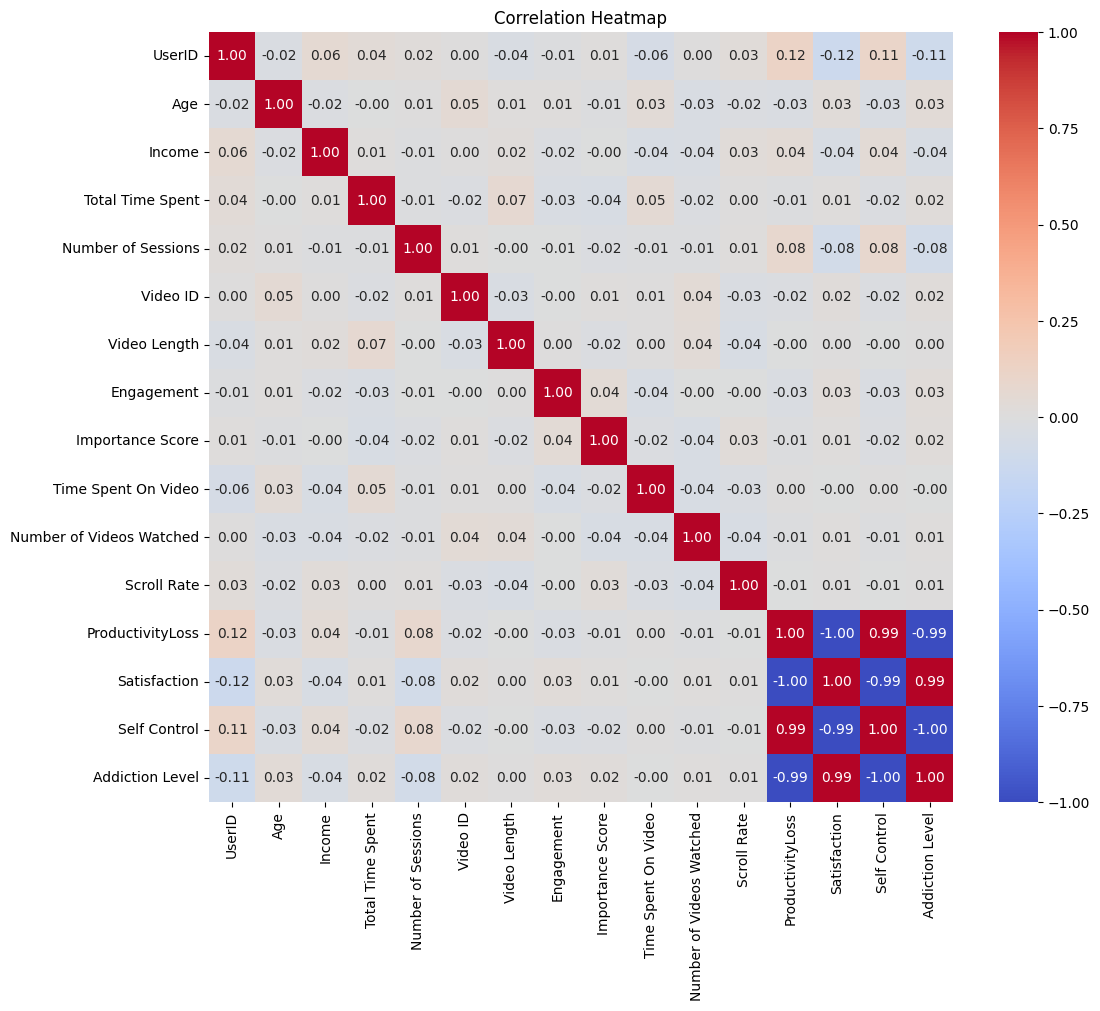

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

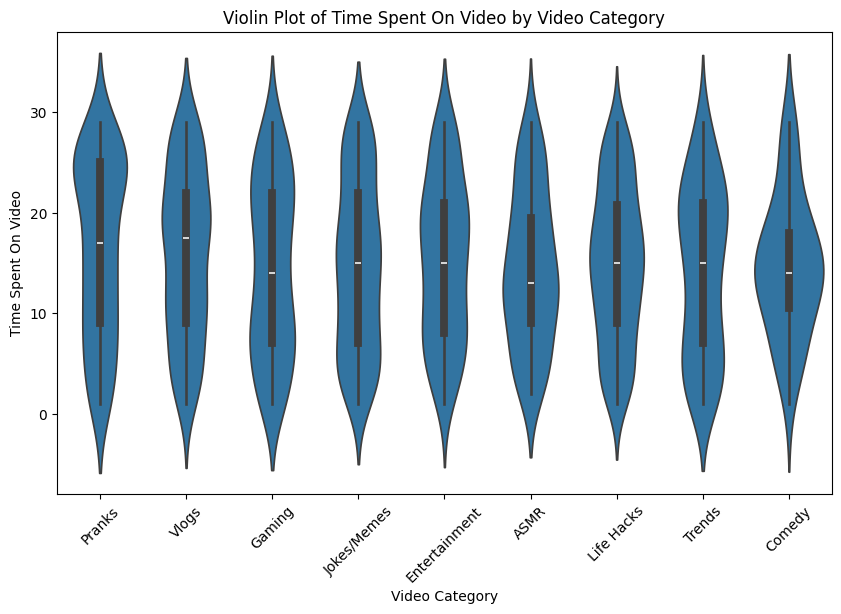

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='Video Category', y='Time Spent On Video', data=df)
plt.title('Violin Plot of Time Spent On Video by Video Category')
plt.xticks(rotation=45)
plt.show()

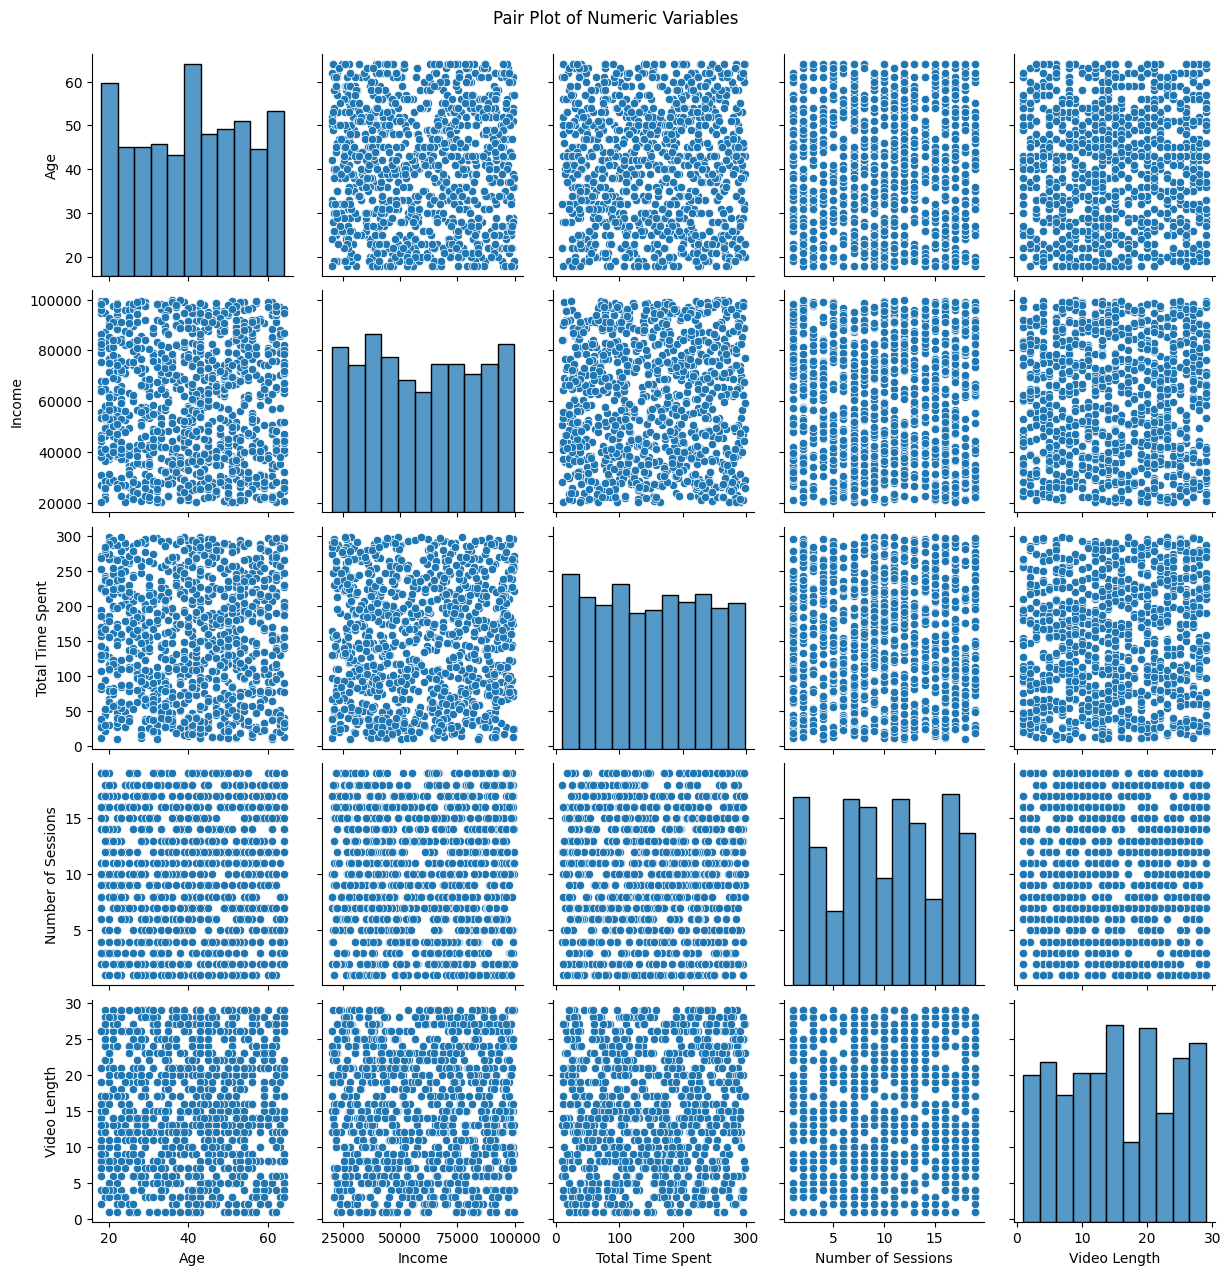

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Age', 'Income', 'Total Time Spent', 'Number of Sessions', 'Video Length']])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

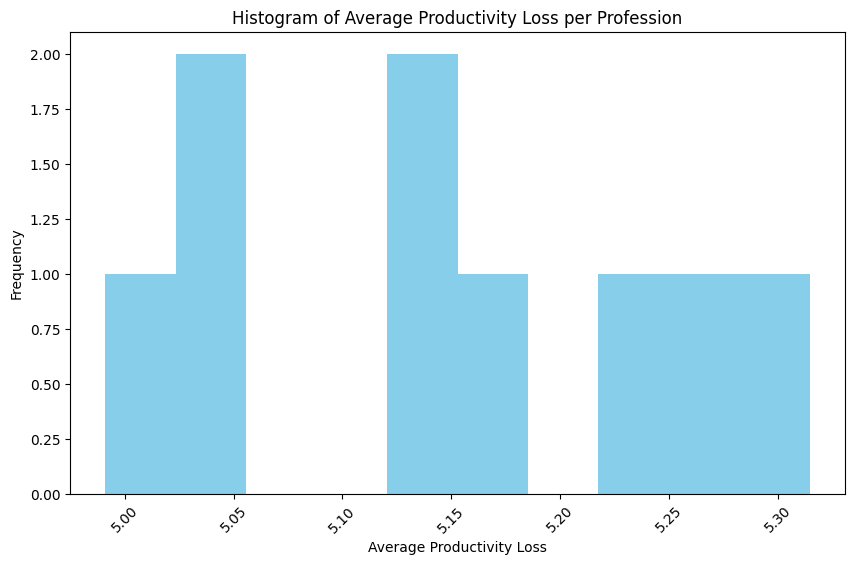

In [ ]:
# Calculate average productivity loss per profession
avg_productivity_loss = df.groupby('Profession')['ProductivityLoss'].mean()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(avg_productivity_loss, bins=10, color='skyblue')
plt.title('Histogram of Average Productivity Loss per Profession')
plt.xlabel('Average Productivity Loss')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-6b25f20ef3d2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')
<ipython-input-13-6b25f20ef3d2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')
<ipython-input-13-6b25f20ef3d2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')


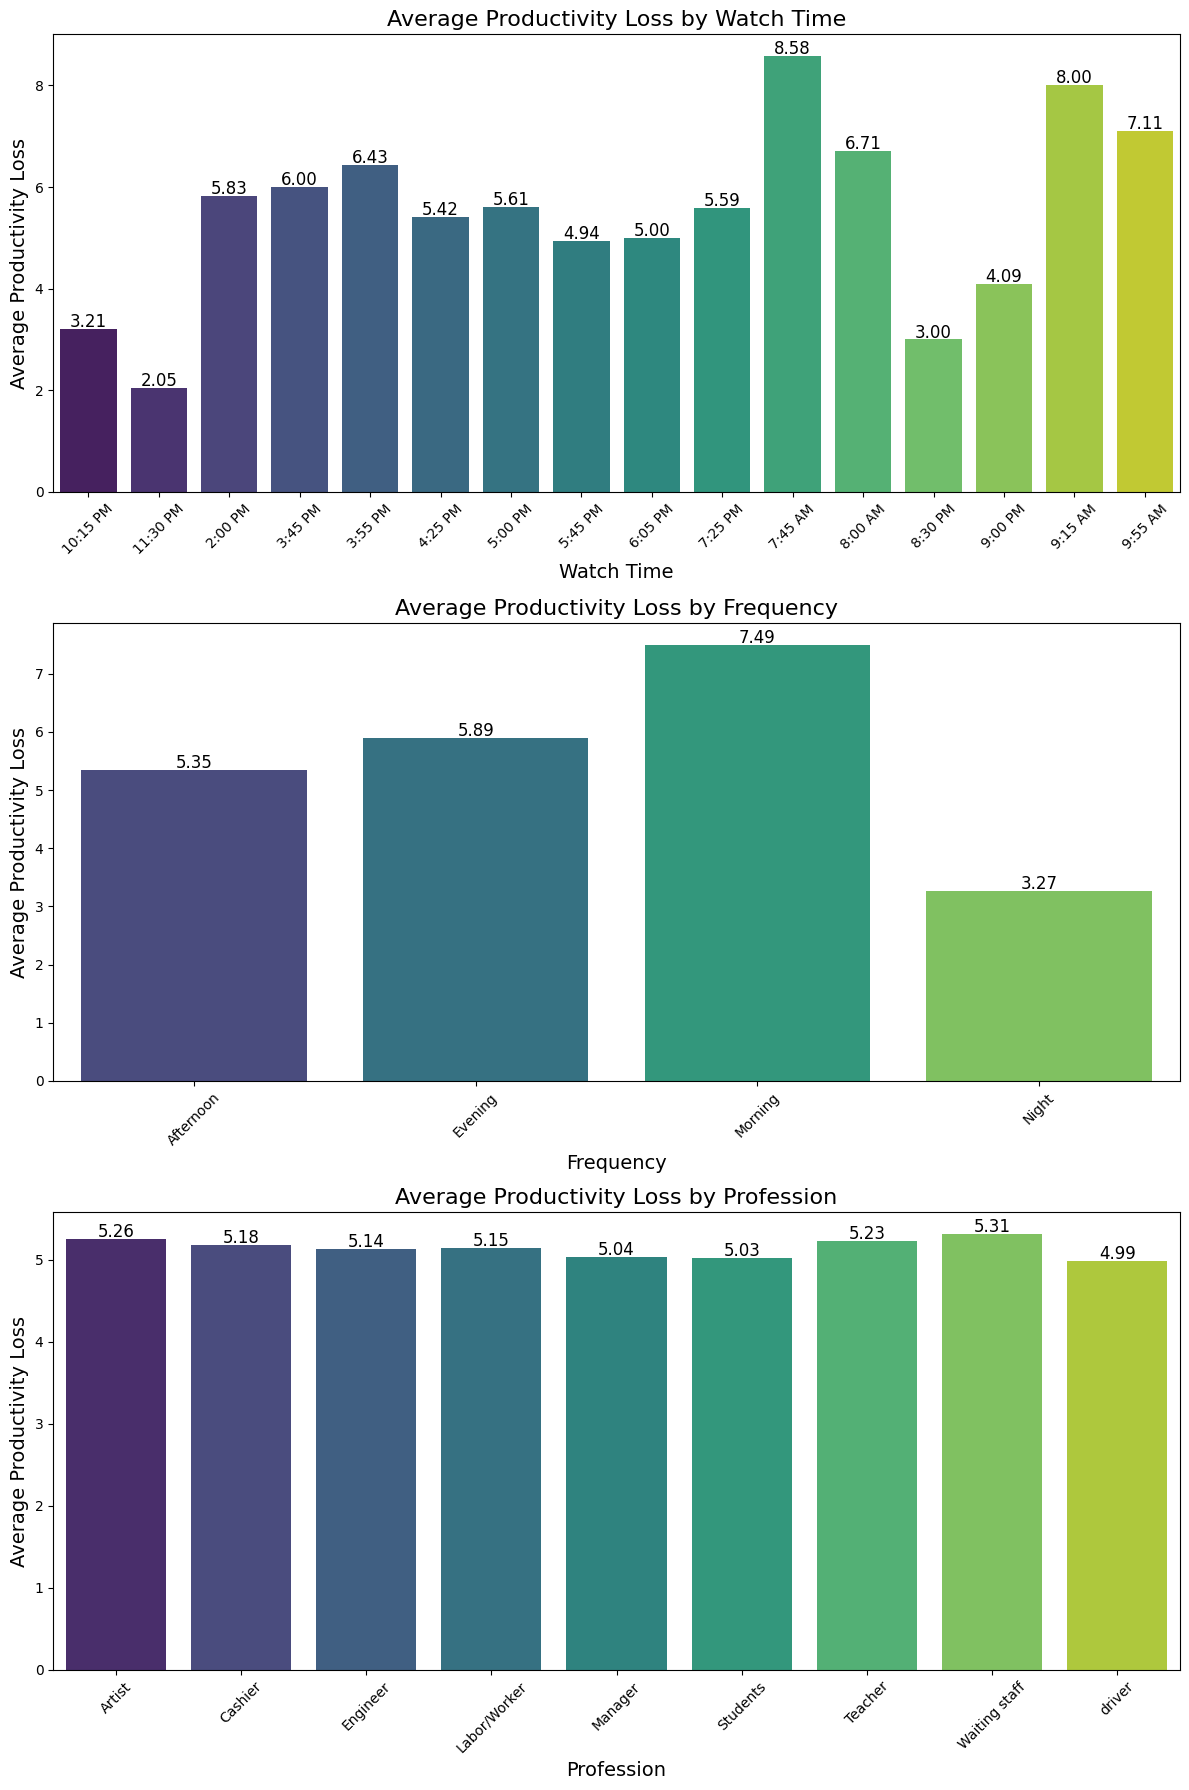

In [ ]:
selected_columns = ['Watch Time', 'Frequency', 'Profession']

# Step 2: Create a large figure to accommodate the plots
plt.figure(figsize=(12, 18))

# Step 3: Create subplots for each selected variable
for idx, col in enumerate(selected_columns):
    # Calculate average productivity loss for each unique value in the column
    avg_loss = df.groupby(col)['ProductivityLoss'].mean().reset_index()

    # Create a subplot for each variable
    plt.subplot(len(selected_columns), 1, idx + 1)
    ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')

    # Set title and labels for each subplot
    plt.title(f'Average Productivity Loss by {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Average Productivity Loss', fontsize=14)

    # Add labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# selected_columns = ['Watch Time', 'Frequency', 'Profession']

# # Step 2: Create a large figure to accommodate the plots
# plt.figure(figsize=(12, 18))

# # Step 3: Create subplots for each selected variable
# for idx, col in enumerate(selected_columns):
#     # Calculate average productivity loss for each unique value in the column
#     avg_loss = df.groupby(col)['ProductivityLoss'].mean().reset_index()

#     # Condense ProductivityLoss values 1-3 into a single category
#     avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].apply(lambda x: '1-3' if 1 <= x <= 3 else x)

#     # Create a subplot for each variable
#     plt.subplot(len(selected_columns), 1, idx + 1)
#     ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')

#     # Set title and labels for each subplot
#     plt.title(f'Average Productivity Loss by {col}', fontsize=16)
#     plt.xlabel(col, fontsize=14)
#     plt.ylabel('Average Productivity Loss', fontsize=14)

#     # Add labels on top of each bar
#     for p in ax.patches:
#         ax.annotate(f'{p.get_height():.2f}',
#                     (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha='center', va='center',
#                     fontsize=12, color='black',
#                     xytext=(0, 5), textcoords='offset points')

#     # Rotate x-axis labels if needed
#     plt.xticks(rotation=45)

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the plot
# plt.show()



<ipython-input-18-a4ccc53fe85c>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].replace('1-3', np.mean([1, 2, 3]))
<ipython-input-18-a4ccc53fe85c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')
<ipython-input-18-a4ccc53fe85c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette=

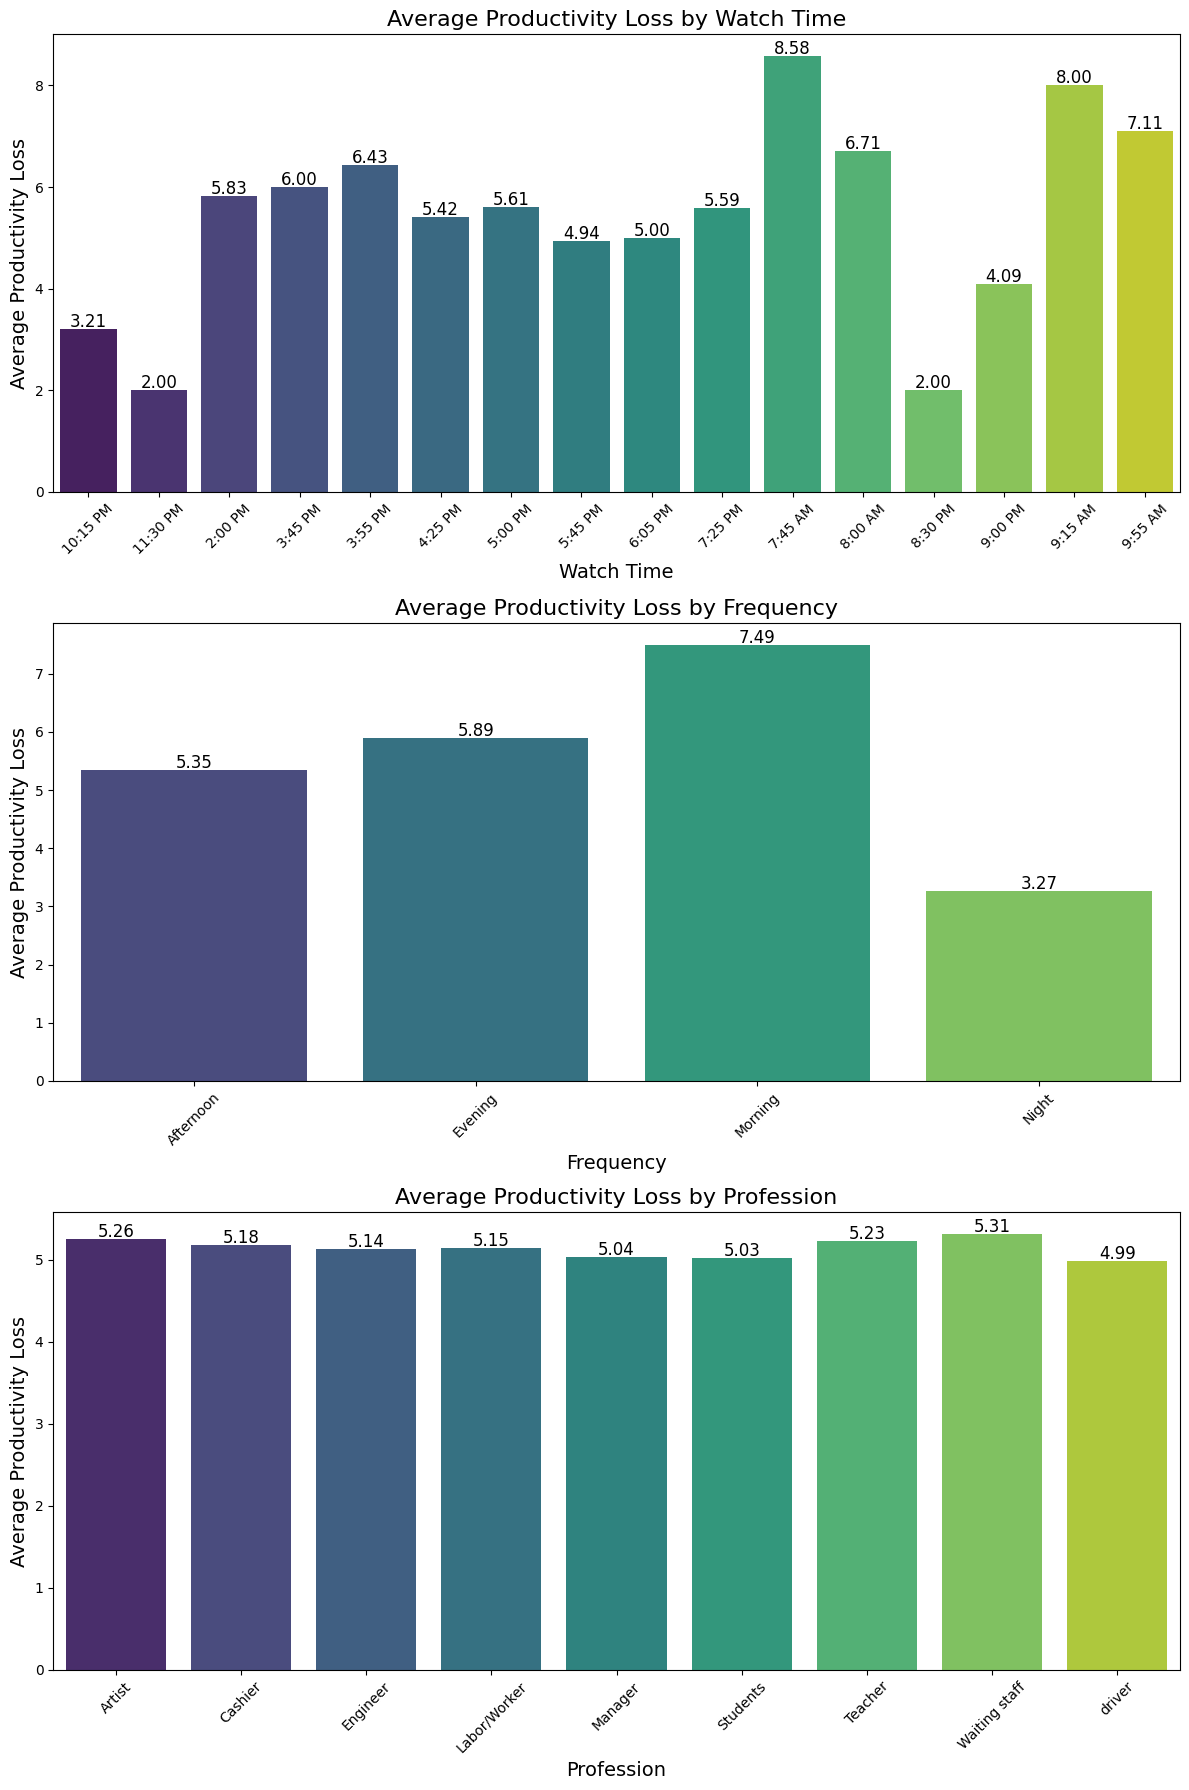

In [ ]:
import numpy as np

selected_columns = ['Watch Time', 'Frequency', 'Profession']

# Step 2: Create a large figure to accommodate the plots
plt.figure(figsize=(12, 18))

# Step 3: Create subplots for each selected variable
for idx, col in enumerate(selected_columns):
    # Calculate average productivity loss for each unique value in the column
    avg_loss = df.groupby(col)['ProductivityLoss'].mean().reset_index()

    # Condense ProductivityLoss values 1-3 into a single category
    avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].apply(lambda x: '1-3' if 1 <= x <= 3 else x)

    # Convert '1-3' to a numerical value (e.g., mean of 1, 2, 3)
    avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].replace('1-3', np.mean([1, 2, 3]))

    # Convert the column to numeric
    avg_loss['ProductivityLoss'] = pd.to_numeric(avg_loss['ProductivityLoss'])

    # Create a subplot for each variable
    plt.subplot(len(selected_columns), 1, idx + 1)
    ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')

    # Set title and labels for each subplot
    plt.title(f'Average Productivity Loss by {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Average Productivity Loss', fontsize=14)

    # Add labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# selected_columns = ['Watch Time', 'Frequency', 'Profession']

# plt.figure(figsize=(12, 18))

# for idx, col in enumerate(selected_columns):
#     avg_loss = df.groupby(col)['ProductivityLoss'].mean().reset_index()
#     avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].apply(lambda x: '1-3' if 1 <= x <= 3 else x)

#     plt.subplot(len(selected_columns), 1, idx + 1)

#     if col == 'Profession':
#         # Before plotting, replace '1-3' with its numerical representation (mean of 1, 2, 3)
#         avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].replace('1-3', np.mean([1, 2, 3]))
#         avg_loss['ProductivityLoss'] = pd.to_numeric(avg_loss['ProductivityLoss'])  # Ensure numeric type

#         ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis', width=0.5)

#         # This part is no longer needed as '1-3' is already replaced with numerical value:
#         # professions = avg_loss[col].unique()
#         # condensed_loss = []
#         # ... (rest of the logic for calculating condensed_loss) ...
#         # for i, p in enumerate(ax.patches):
#         #     p.set_height(condensed_loss[i])

#     else:
#         ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')

#     plt.title(f'Average Productivity Loss by {col}', fontsize=16)
#     plt.xlabel(col, fontsize=14)
#     plt.ylabel('Average Productivity Loss', fontsize=14)

#     for p in ax.patches:
#         ax.annotate(f'{p.get_height():.2f}',
#                     (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha='center', va='center',
#                     fontsize=12, color='black',
#                     xytext=(0, 5), textcoords='offset points')

#     plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

<ipython-input-22-04942a7bce1e>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')


ValueError: Unable to parse string "1-3" at position 1

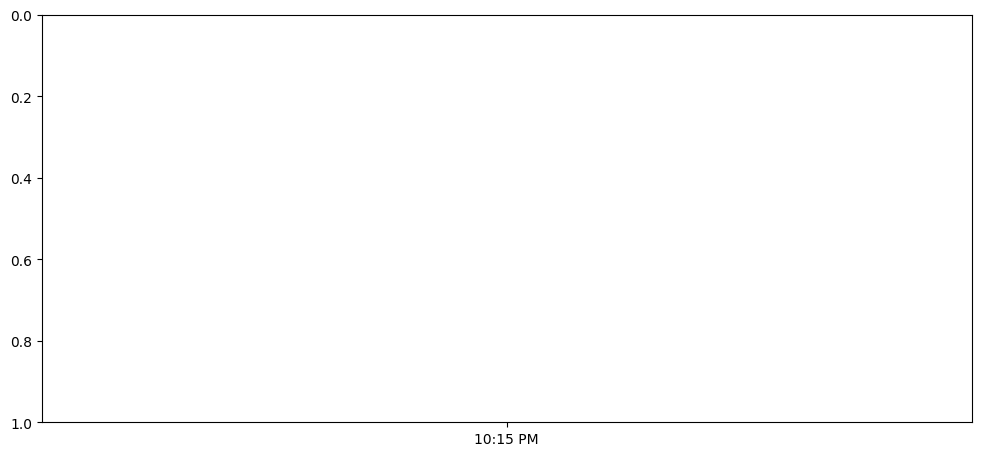

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['Watch Time', 'Frequency', 'Profession']

plt.figure(figsize=(12, 18))

for idx, col in enumerate(selected_columns):
    avg_loss = df.groupby(col)['ProductivityLoss'].mean().reset_index()
    avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].apply(lambda x: '1-3' if 1 <= x <= 3 else x)

    plt.subplot(len(selected_columns), 1, idx + 1)

    if col == 'Profession':
        # Before plotting, replace '1-3' with its numerical representation (mean of 1, 2, 3)
        avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].replace('1-3', np.mean([1, 2, 3]))
        avg_loss['ProductivityLoss'] = pd.to_numeric(avg_loss['ProductivityLoss'])  # Ensure numeric type

        ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis', width=0.5)

        # This part is no longer needed as '1-3' is already replaced with numerical value:
        # professions = avg_loss[col].unique()
        # condensed_loss = []
        # ... (rest of the logic for calculating condensed_loss) ...
        # for i, p in enumerate(ax.patches):
        #     p.set_height(condensed_loss[i])

    else:
        ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')

    plt.title(f'Average Productivity Loss by {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Average Productivity Loss', fontsize=14)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-24-7d2aa1bdcdb9>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].replace('1-3', np.mean([1, 2, 3]))
<ipython-input-24-7d2aa1bdcdb9>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')
<ipython-input-24-7d2aa1bdcdb9>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette=

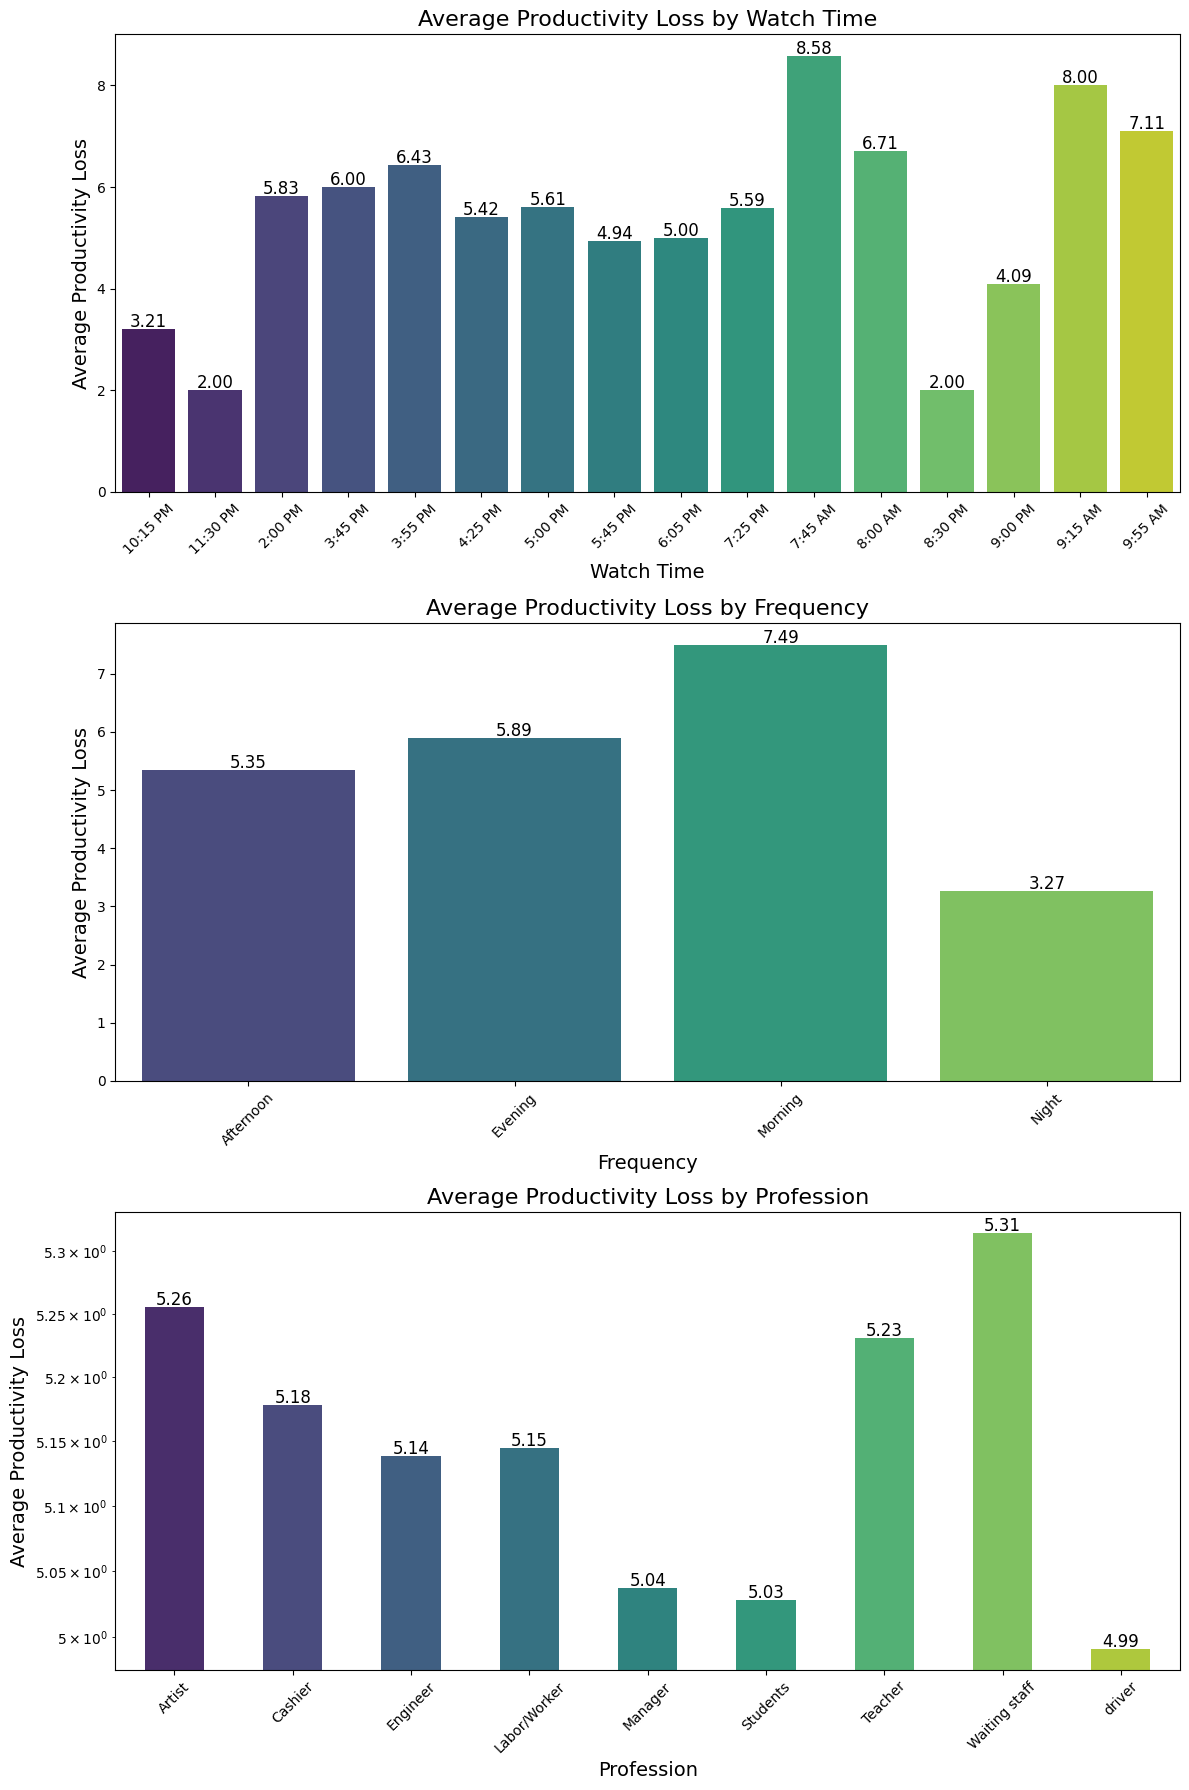

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = ['Watch Time', 'Frequency', 'Profession']

plt.figure(figsize=(12, 18))

for idx, col in enumerate(selected_columns):
    avg_loss = df.groupby(col)['ProductivityLoss'].mean().reset_index()
    avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].apply(lambda x: '1-3' if 1 <= x <= 3 else x)

    plt.subplot(len(selected_columns), 1, idx + 1)

    # For all subplots, replace '1-3' with its numerical representation (mean of 1, 2, 3)
    avg_loss['ProductivityLoss'] = avg_loss['ProductivityLoss'].replace('1-3', np.mean([1, 2, 3]))
    avg_loss['ProductivityLoss'] = pd.to_numeric(avg_loss['ProductivityLoss'])  # Ensure numeric type

    # ... (previous code) ...

    if col == 'Profession':
        ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis', width=0.5) # Adjust width here
        ax.set_yscale("log") # Set logarithmic scale for the y-axis
# ... (rest of the code) ...
    else:
        ax = sns.barplot(x=col, y='ProductivityLoss', data=avg_loss, palette='viridis')

    plt.title(f'Average Productivity Loss by {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Average Productivity Loss', fontsize=14)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

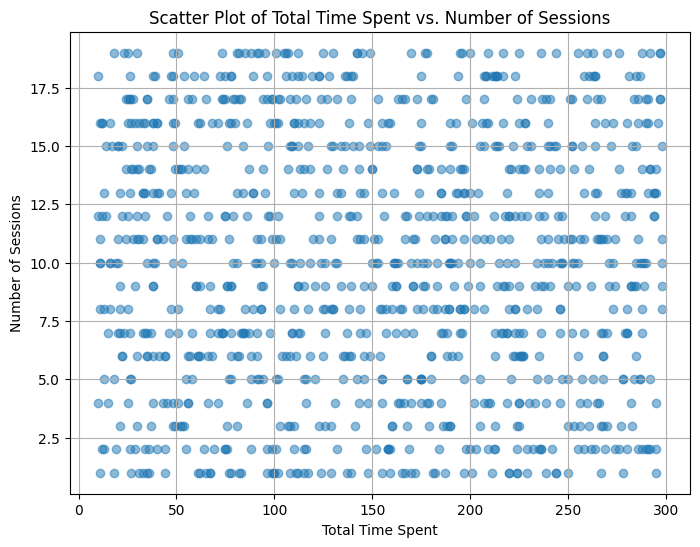

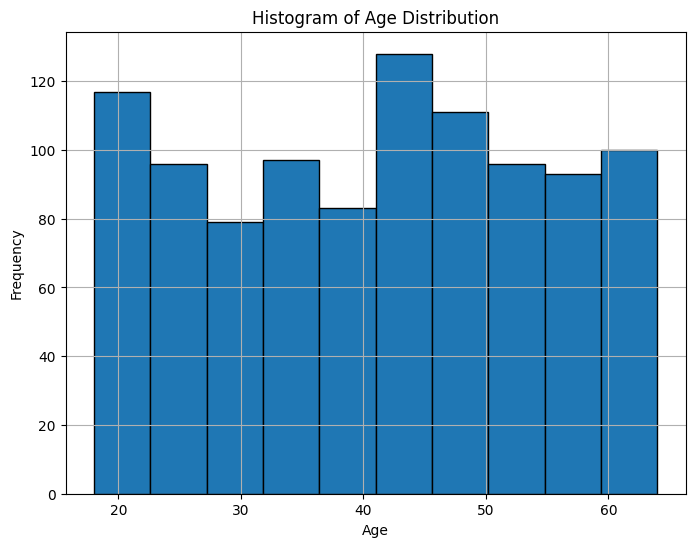

In [25]:
import matplotlib.pyplot as plt

# Scatter plot highlighting 'Total Time Spent' and 'Number of Sessions'
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['Total Time Spent'], df['Number of Sessions'], alpha=0.5)
plt.title('Scatter Plot of Total Time Spent vs. Number of Sessions')
plt.xlabel('Total Time Spent')
plt.ylabel('Number of Sessions')
plt.grid(True)  # Add a grid for better readability
plt.show()

# Histogram highlighting 'Age' distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
# Assuming 'Timestamp' is your timestamp column
df['TimeOfDay'] = pd.to_datetime(df['Timestamp']).dt.hour + pd.to_datetime(df['Timestamp']).dt.minute / 60

KeyError: 'Timestamp'

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['TimeOfDay'], bins=24, edgecolor='black')  # 24 bins for each hour
plt.title('Distribution of Activities by Time of Day')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Frequency')
plt.xticks(range(24))  # Set x-axis ticks to represent hours
plt.grid(True)
plt.show()

KeyError: 'TimeOfDay'

<Figure size 1000x600 with 0 Axes>

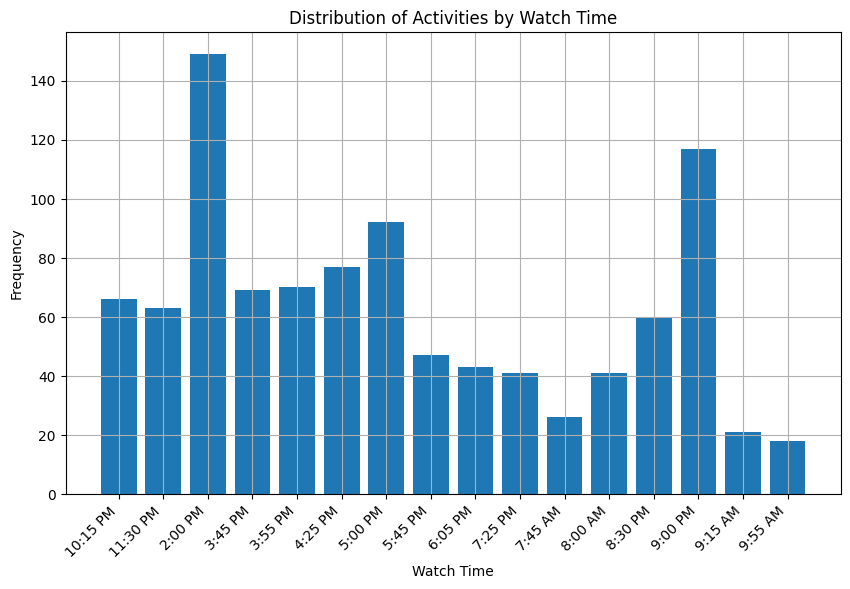

In [28]:
import matplotlib.pyplot as plt

# Group data by "Watch Time" and count the frequency
watch_time_counts = df.groupby('Watch Time')['UserID'].count()  # Assuming 'UserID' represents individual entries

plt.figure(figsize=(10, 6))
plt.bar(watch_time_counts.index, watch_time_counts.values)
plt.title('Distribution of Activities by Watch Time')
plt.xlabel('Watch Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

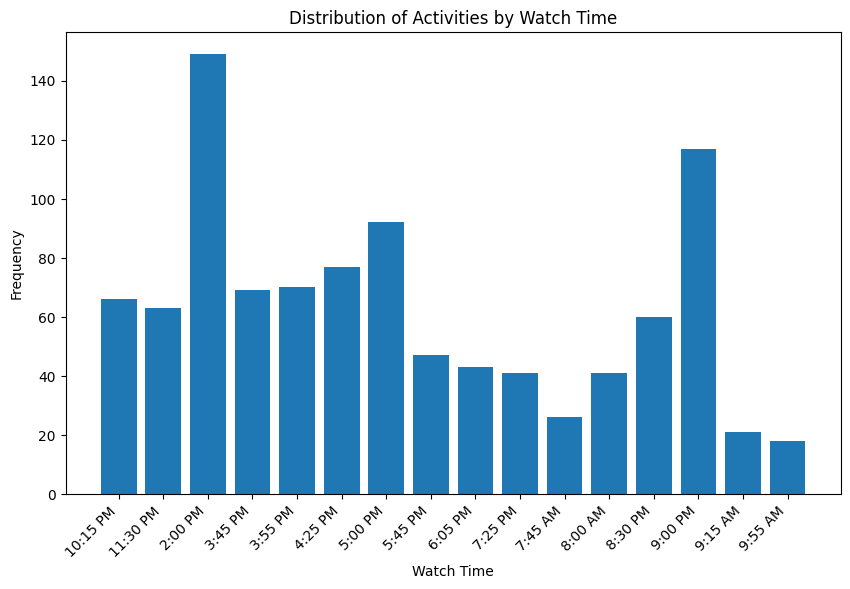

In [29]:
import matplotlib.pyplot as plt

# Group data by "Watch Time" and count the frequency
watch_time_counts = df.groupby('Watch Time')['UserID'].count()

plt.figure(figsize=(10, 6))
plt.bar(watch_time_counts.index, watch_time_counts.values)
plt.title('Distribution of Activities by Watch Time')
plt.xlabel('Watch Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(False)  # Remove the grid
plt.show()

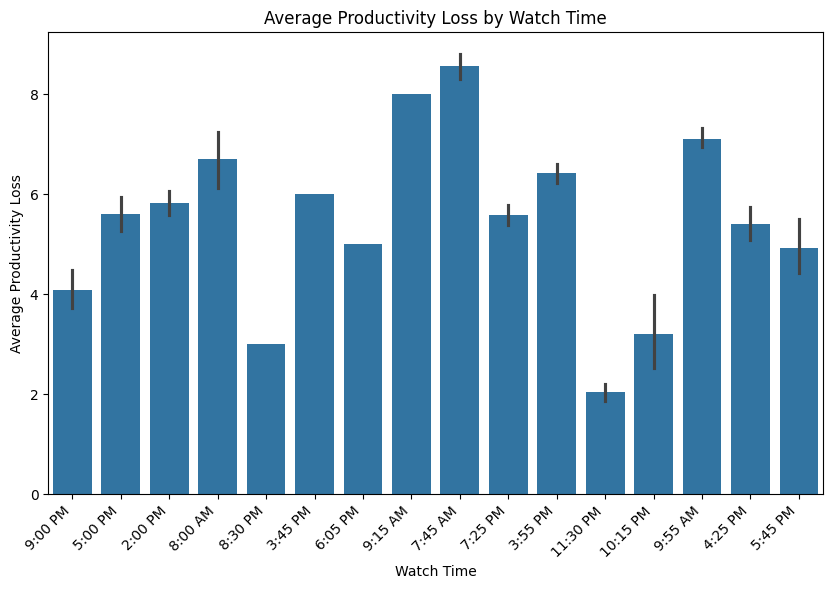

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Watch Time', y='ProductivityLoss', data=df)
plt.title('Average Productivity Loss by Watch Time')
plt.xlabel('Watch Time')
plt.ylabel('Average Productivity Loss')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()